# Chapter 11 In-chapter examples

In [1]:
# import libraries 
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [2]:
# define global figure properties
import matplotlib_inline.backend_inline
matplotlib_inline.backend_inline.set_matplotlib_formats('svg') # display figures in vector format
plt.rcParams.update({'font.size':14,             # font size
                     'axes.titlelocation':'left',# title location
                     'axes.spines.right':False,  # remove axis bounding box
                     'axes.spines.top':False,    # remove axis bounding box
                     })

### Fig 11.1: Goals of the t-test

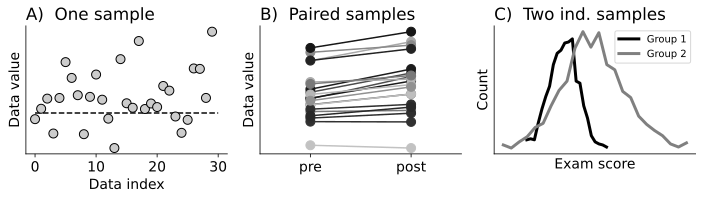

In [3]:
_,axs = plt.subplots(1,3,figsize=(10,3))

# panel A: one-sample t-test
data = np.random.normal(loc=.5,size=30)
axs[0].plot(data,'ko',markersize=9,markerfacecolor=(.8,.8,.8))
axs[0].plot([0,len(data)],[0,0],'k--',zorder=-10)
axs[0].set(xlabel='Data index',ylabel='Data value',yticks=[],
           title=r'A)  One sample')



# panel B: paired-samples t-test
N = 20
data1 = np.random.normal(size=N)
data2 = data1 + .5 + np.random.randn(N)*.4
for x,y in zip(data1,data2):
  # pick a random color
  c = np.random.uniform(low=0,high=.8)

  # plot it
  axs[1].plot([0,1],[x,y],'o-',markersize=9,markerfacecolor=(c,c,c),color=(c,c,c))

# plot adjustments
axs[1].set(xlim=[-.5,1.5],xticks=[0,1],xticklabels=['pre','post'],
           yticks=[],ylabel='Data value',title=r'B)  Paired samples')



# panel C: two-samples t-test
for i in range(2):

  # create the data
  data = np.random.normal(loc=i,scale=(i+1)/2,size=1000)

  # take their histogram
  yy,xx = np.histogram(data,bins='fd')
  xx = (xx[1:]+xx[:-1])/2

  # plot
  c = i/2
  axs[2].plot(xx,yy,linewidth=3,color=(c,c,c))

# plot adjustments
axs[2].set(xlabel='Exam score',ylabel='Count',xticks=[],yticks=[],title=r'C)  Two ind. samples')
axs[2].legend(['Group 1','Group 2'],loc='upper right',fontsize=10)


# display the figure
plt.tight_layout()
plt.show()

### Fig 11.2: t-pdf

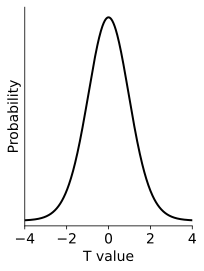

In [4]:
t = np.linspace(-4,4,573)

# a pdf with df=20
tpdf = stats.t.pdf(t,20)

plt.figure(figsize=(3,4))
plt.plot(t,tpdf,'k',linewidth=2)
plt.xlabel('T value')
plt.ylabel('Probability')
plt.yticks([])
plt.ylim([-.01,np.max(tpdf)*1.05])
plt.xlim(t[[0,-1]])

# display the figure
plt.tight_layout()
plt.show()

### Computing p-values for one tailed and two tailed tests

In [5]:
tval = 2.1
df = 13

pvalL = stats.t.cdf(-tval,df)
pvalR = stats.t.sf(tval,df)   #1-stats.t.cdf(tval,df)
pval2 = pvalR+pvalL

print(f'One-tailed p-value on the left:  {pvalL}')
print(f'One-tailed p-value on the right: {pvalR}')
print(' ')
print(f'Two-tailed p-value as the sum:   {pvalL+pvalR}')
print(f'Two-tailed p-value by doubling:  {2*pvalL}')
     

# 1-cdf vs survival function:
pvalC = 1-stats.t.cdf(tval,df)
pvalS = stats.t.sf(tval,df) # sf = survival function

print(f'P-value from 1-cdf: {pvalC}')
print(f'P-value from s.f.:  {pvalS}')
print(f'Difference:         {pvalC-pvalS}')

# So: The difference for this particular t-value is at machine precision.
#  can also use sf instead of 1-cdf.

One-tailed p-value on the left:  0.027906302135628887
One-tailed p-value on the right: 0.027906302135628887
 
Two-tailed p-value as the sum:   0.055812604271257775
Two-tailed p-value by doubling:  0.055812604271257775
P-value from 1-cdf: 0.027906302135628946
P-value from s.f.:  0.027906302135628887
Difference:         5.898059818321144e-17


### Fig 11.3: T-values from p-values

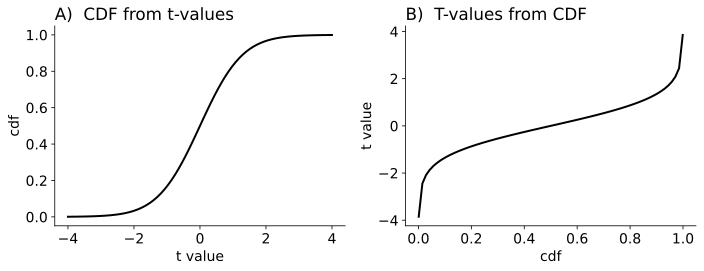

In [6]:
# parameters
t = np.linspace(-4,4,75)
df = 13

# cdf based on t-values
cdf = stats.t.cdf(t,df)

# t-values based on cdf
pvals = np.linspace(.001,.999,73)
tVals = -stats.t.isf(pvals,df) # sf is 1-cdf, and isf is the inverse of the sf. so 1-isf is inv(cdf)

# same as below, but isf has slightly higher accuracy
#tVals = stats.t.ppf(pvals,df) # ppf = Percent point function, this is the inverse of the cdf


# visualize
_,axs = plt.subplots(1,2,figsize=(10,4))
axs[0].plot(t,cdf,'k',linewidth=2)
axs[0].set(xlabel='t value',ylabel='cdf',title=r'A)  CDF from t-values')

axs[1].plot(pvals,tVals,'k',linewidth=2)
axs[1].set(ylabel='t value',xlabel='cdf',title=r'B)  T-values from CDF')

# display the figure
plt.tight_layout()
plt.show()

In [7]:

# example usage to get the t-value associated with p=.25 and df=13
pval = .25
tFromP_L  = -stats.t.isf(  pval,df) # negative of the opposite-cdf for the left tail
tFromP_R1 = -stats.t.isf(1-pval,df) # negative of the opposite-cdf for the right tail
tFromP_R2 =  stats.t.isf(  pval,df) # opposite-cdf for the left tail

print(f'Variable tFromP_L:  {tFromP_L:.3f}')
print(f'Variable tFromP_R1: {tFromP_R1:.3f}')
print(f'Variable tFromP_R2: {tFromP_R2:.3f}')

Variable tFromP_L:  -0.694
Variable tFromP_R1: 0.694
Variable tFromP_R2: 0.694


### Fig 11.4: Example t-value

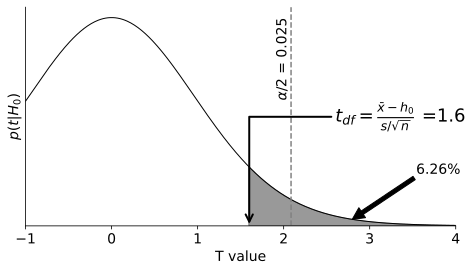

In [8]:
# empirical t-value and df
tval = 1.6
df   = 20
alpha = .05

# redefine the t-values and corresponding pdf
t = np.linspace(-4,4,573)
tpdf = stats.t.pdf(t,20)


# its associated p-value (but this is one-tailed for visualization; see text and next cell!)
pval = 1-stats.t.cdf(tval,df)

# critical t-value for alpha
tCrit = stats.t.isf(alpha/2,df) # /2 for two-tailed!
pHalf = np.max(tpdf)/2 # 1/2 max. (vertical) p(t), used for plotting



plt.figure(figsize=(7,4))

# plot the t distribution
plt.plot(t,tpdf,'k',linewidth=1,label=r'$t_{20}$-pdf under $H_0$')

# plot the dashed line for the critical t-value
plt.axvline(tCrit,linestyle='--',color='gray')
plt.text(tCrit-.02,pHalf*2,r'$\alpha / 2$ = %g'%(alpha/2),rotation=90,va='top',ha='right')

# arrow and formula for the empirical t-value
plt.gca().annotate(r'$t_{df} = \frac{\bar{x}-h_0}{s/\sqrt{n}}$ =%g'%tval,xytext=(tval+1,pHalf),
                xy=(tval,0), xycoords='data',size=18,
                arrowprops=dict(arrowstyle='->', color='k',linewidth=2,
                                connectionstyle='angle,angleA=0,angleB=-90,rad=0'))


# shaded area to the right of the empirical t-value
tidx = np.argmin(np.abs(t-tval))
plt.gca().fill_between(t[tidx:],tpdf[tidx:],color='k',alpha=.4)

# and its annotation
tidx = np.argmin(np.abs(t-(tval+t[-1])/2))
plt.gca().annotate(f'{100*pval:.2f}%',xy=(t[tidx],tpdf[tidx]),
            xytext=(t[tidx]+1,pHalf/2),ha='center',arrowprops={'color':'k'})


# some final adjustments
plt.xlabel('T value')
plt.ylabel(r'$p(t|H_0)$')
plt.yticks([])
plt.ylim([-.01,np.max(tpdf)*1.05])
plt.xlim([-1,t[-1]])
plt.ylim([0,pHalf*2.1])

plt.tight_layout()
plt.show()

### Fig 11.5: completion of previous figure to show both tails

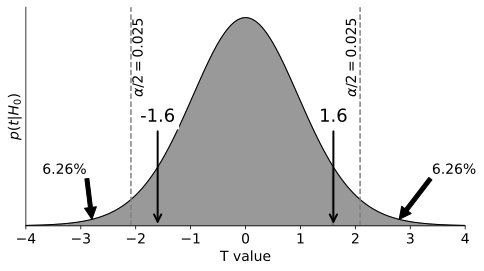

In [11]:
plt.figure(figsize=(7,4))

# t distribution
plt.plot(t, tpdf, 'k', linewidth=1, label=r'$t_{20}$-pdf under $H_0$')

# dashed line for the critical t-value on right side
plt.axvline(tCrit, linestyle='--', color='gray')
plt.text(tCrit-0.02, pHalf * 2, r'$\alpha/2 = %g$'%(alpha/2), rotation=90, va='top', ha='right')

# and for the left side
plt.axvline(-tCrit, linestyle='--', color='gray')
plt.text(-tCrit+0.02, pHalf * 2, r'$\alpha/2 = %g$'%(alpha/2), rotation=90, va='top', ha='left')

# arrow and formula for the empirical t-value
plt.gca().annotate(r'%g'%tval,xytext=(tval,pHalf),
                xy=(tval,0), xycoords='data',size=18,ha='center',bbox=dict(fc='w',edgecolor='none'),
                arrowprops=dict(arrowstyle='->', color='k',linewidth=2))

# repeat on the left
plt.gca().annotate(r'-%g'%tval,xytext=(-tval,pHalf),
                xy=(-tval,0), xycoords='data',size=18,ha='center',bbox=dict(fc='w',edgecolor='none'),
                arrowprops=dict(arrowstyle='->', color='k',linewidth=2))

# shaded area to the right of the empirical t-value
tidx = np.argmin(np.abs(t-tval))
plt.gca().fill_between(t[tidx:],tpdf[tidx:],color='k',alpha=.4)
tidx = np.argmin(np.abs(t-tval))
plt.gca().fill_between(t[:tidx],tpdf[:tidx],color='k',alpha=.4)

# and its annotation for the right side
tidx = np.argmin(np.abs(t-(tval+t[-1])/2))
plt.gca().annotate(f'{100*pval:.2f}%',xy=(t[tidx],tpdf[tidx]),xytext=(t[tidx]+1,pHalf/2),ha='center',arrowprops={'color':'k'})

# now for the left side
tidx = np.argmin(np.abs(t-(-tval+t[0])/2))
plt.gca().annotate(f'{100*pval:.2f}%',xy=(t[tidx],tpdf[tidx]),xytext=(t[tidx]-.5,pHalf/2),ha='center',arrowprops={'color':'k'})


# some final adjustments
plt.xlabel('T value')
plt.ylabel(r'$p(t|H_0)$')
plt.yticks([])
plt.ylim([-.01,np.max(tpdf)*1.05])
plt.xlim(t[[0,-1]])
plt.ylim([0,pHalf*2.1])

plt.tight_layout()
plt.show()